# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('startup.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Exploratory Data Analysis

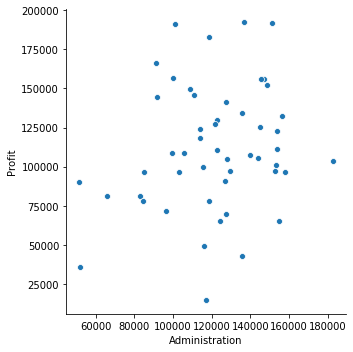

In [3]:
sns.relplot(x='Administration',y='Profit',data=df)

In [4]:
df.isnull().mean()

R&D Spend          0.0
Administration     0.0
Marketing Spend    0.0
State              0.0
Profit             0.0
dtype: float64

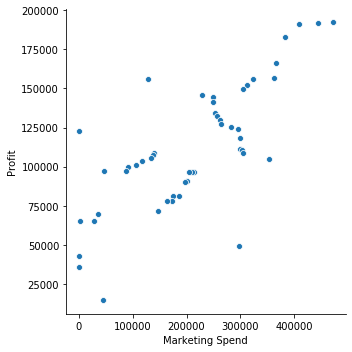

In [5]:
sns.relplot(x='Marketing Spend',y='Profit',data=df)

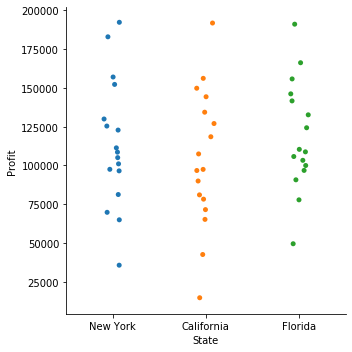

In [6]:
sns.catplot(x='State',y='Profit',data=df)

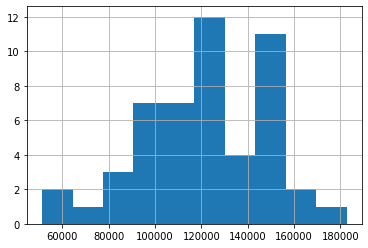

In [7]:
df.Administration.hist(bins=10)

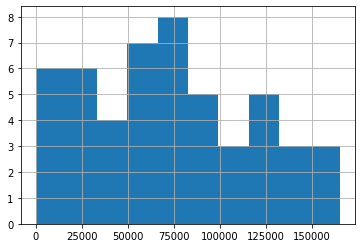

In [11]:
df['R&D Spend'].hist(bins=10)

In [12]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


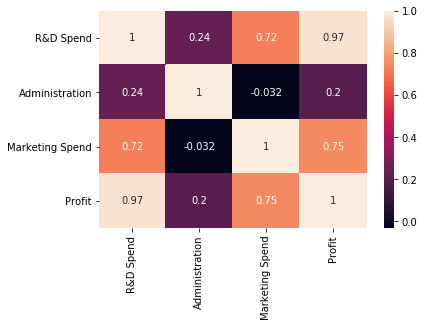

In [13]:
sns.heatmap(df.corr(),annot=True)

# One hot encoding

In [14]:
df=pd.get_dummies(df)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [16]:
X=df.drop('Profit',axis=1)
y=df.Profit

In [17]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

# Model Building

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [19]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [20]:
reg.fit(X_train,Y_train)
y_pred=reg.predict(X_test)

In [22]:
from sklearn.metrics import r2_score
print(r2_score(Y_test,y_pred))

0.9347068473282424


In [23]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [24]:
rf.fit(X_train,Y_train)


RandomForestRegressor()

In [26]:
y_pred1=rf.predict(X_test)

In [34]:
print(r2_score(Y_test,y_pred1))

0.9618667636234652


In [35]:
from sklearn.tree import DecisionTreeRegressor

In [36]:
dt= DecisionTreeRegressor()

In [37]:
dt.fit(X_train,Y_train)

DecisionTreeRegressor()

In [38]:
y_pred2=dt.predict(X_test)

In [39]:
print(r2_score(Y_test,y_pred2))

0.9589635197429642
